# Difference in time and performance between the KNN algorithm from sclearn and the manually developed algorithm.

In [1]:
#PIP LIST
import numpy as np
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import time
import matplotlib.pyplot as plt

### CHAPTER 1. KNN algoritm

In [2]:
# Dataset in this exercise was chosen to be from sklearn.datasets

np.random.seed(12)
digits = datasets.load_digits()
X = digits.data  # images of digits (8x8) 
y = digits.target  # labels (0-9)
train_border = 150
test_border = 50

dataset = datasets.load_digits()
X_train, y_train = X[:train_border], y[:train_border]
X_test, y_test = X[train_border:train_border+test_border], y[train_border:train_border+test_border]



In [3]:
#Handcrafted KNN algoritm 

class KNN_model:

    def __init__(self, k_neighbors):
        '''initiliazion model'''
        self.k = k_neighbors
        self.X_train = None
        self.y_train = None

    
    def fit(self, X_train, y_train):
        '''saving train data'''
        self.X_train = X_train
        self.y_train = y_train.flatten().astype(int)

    
    def euc_distance(self, x1, x2):
        '''euclidean distance'''
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        '''prediction our model on test_data'''
        y_pred = []

        for x_test in X_test:
            
            distances = [self.euc_distance(x_test, x_train) for x_train in self.X_train] # calculating distances
            
            k_id = np.argsort(distances)[:self.k] # k_nearest indicies 
            
            k_labels = [self.y_train[i] for i in k_id] # k_nearest labels

            most_commom = np.bincount(k_labels).argmax() # calculate the most common label
            y_pred.append(most_commom) # appending to our list
            

        return np.array(y_pred)



In [4]:
model1 = KNN_model(3)
_ = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

res = classification_report(y_test, y_pred1)
print(res)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         5

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



#### We can see that our model has good acuracy, so let's move on to creating KNN algoritm from sklearn

### CHAPTER 2. KNN algoritm from sklearn

In [5]:
model2 = KNeighborsClassifier(n_neighbors=3)
_ = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

res = classification_report(y_test, y_pred2)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         5

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.97        50
weighted avg       0.98      0.98      0.98        50



### We can see that our algorithm that we made before has the same accuracy, which means it repeats the algorithm from the sklearn library. Now we will check the execution speed of these two algorithms with increasing k-nearest neighbors

### CHAPTER 3. Difference

In [6]:
# time perfomance
ks = range(1, 100)
manual_times = []
sklearn_times = []

for k in ks:
    # Handcrafted algoritm
    model_manual = KNN_model(k)
    model_manual.fit(X_train, y_train)
    start_manual = time.time()
    y_pred_manual = model_manual.predict(X_test)
    end_manual = time.time()
    manual_times.append(end_manual - start_manual)

    # Sklearn algoritm
    model_sklearn = KNeighborsClassifier(n_neighbors=k)
    model_sklearn.fit(X_train, y_train)
    start_sklearn = time.time()
    y_pred_sklearn = model_sklearn.predict(X_test)
    end_sklearn = time.time()
    sklearn_times.append(end_sklearn - start_sklearn)

# Results
for k, t1, t2 in zip(ks, manual_times, sklearn_times):
    print(f"k={k}: Handcrafted KNN={t1:.5f} с | Sklearn KNN={t2:.5f} с") if k%5 == 0 else ''



k=5: Handcrafted KNN=0.04213 с | Sklearn KNN=0.00302 с
k=10: Handcrafted KNN=0.04175 с | Sklearn KNN=0.00201 с
k=15: Handcrafted KNN=0.04163 с | Sklearn KNN=0.00301 с
k=20: Handcrafted KNN=0.04140 с | Sklearn KNN=0.00201 с
k=25: Handcrafted KNN=0.04146 с | Sklearn KNN=0.00302 с
k=30: Handcrafted KNN=0.04168 с | Sklearn KNN=0.00315 с
k=35: Handcrafted KNN=0.04194 с | Sklearn KNN=0.00310 с
k=40: Handcrafted KNN=0.04228 с | Sklearn KNN=0.00310 с
k=45: Handcrafted KNN=0.04123 с | Sklearn KNN=0.00303 с
k=50: Handcrafted KNN=0.04134 с | Sklearn KNN=0.00201 с
k=55: Handcrafted KNN=0.04279 с | Sklearn KNN=0.00306 с
k=60: Handcrafted KNN=0.04026 с | Sklearn KNN=0.00302 с
k=65: Handcrafted KNN=0.04024 с | Sklearn KNN=0.00204 с
k=70: Handcrafted KNN=0.04204 с | Sklearn KNN=0.00200 с
k=75: Handcrafted KNN=0.04124 с | Sklearn KNN=0.00201 с
k=80: Handcrafted KNN=0.04763 с | Sklearn KNN=0.00316 с
k=85: Handcrafted KNN=0.04152 с | Sklearn KNN=0.00205 с
k=90: Handcrafted KNN=0.04190 с | Sklearn KNN=0.0

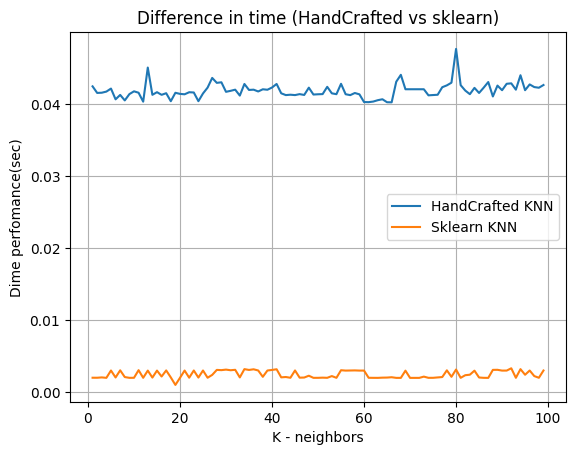

In [7]:
#  Graph
plt.plot(ks, manual_times, label="HandCrafted KNN", marker='')
plt.plot(ks, sklearn_times, label="Sklearn KNN", marker='')
plt.xlabel("K - neighbors")
plt.ylabel("Dime perfomance(sec)")
plt.title("Difference in time (HandCrafted vs sklearn)")
plt.legend()
plt.grid(True)
plt.show()

### CHAPTER 4. Conclusion

The experimental comparison showed that the KNN implementation with sklearn is more than 20 times faster than the manually written implementation. Both implementations have the same functionality, but the library version is much more efficient due to the use of optimized data structures and low-level programming languages. The manual implementation is useful for educational purposes, but its performance is not sufficient for processing large amounts of data.

The main reason for the slower performance of the manual implementation is that it

* uses naive approaches to computation, such as a full search of distances to all points of the training set (without any index structures),

* uses full sorting of the array of distances (np.argsort), which has a time complexity of O(n log n) instead of the possible O(n) with partial sorting,

* does not use vectorization or specialized nearest neighbor search algorithms (such as KD-trees or Ball Tree).

Instead, the implementation with sklearn is based on optimized C/Fortran subsystems that can significantly reduce the execution time, especially when working with large samples or in real-world machine learning tasks.

The manual implementation was created primarily for educational purposes - to better understand the internal logic of KNN: how distances are calculated, how nearest neighbors are selected, and how the final class is determined. It is not focused on performance or scaling. In real-world projects, it is advisable to use proven, high-performance libraries such as scikit-learn to build effective classification models.

